In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

# Loading and preparing data for merge

In [2]:
df_rank = pd.read_csv('datasets/breed_rank.csv').sort_values('Breed').reset_index(drop=True)
df_traits = pd.read_csv('datasets/breed_traits.csv').sort_values('Breed').reset_index(drop=True)

In [3]:
df_traits = df_traits.rename(columns={'Breed':'bred'})

df_rank = (df_rank
       .drop([df_rank.index[25]]).reset_index(drop=True)
       .drop([df_rank.index[133]]).reset_index(drop=True)
       .drop([df_rank.index[134]]).reset_index(drop=True)
      )
df_rank.Breed = df_rank.Breed.str.replace('Cirnechi dell Etna', "Cirnechi dell’Etna")

df_traits.bred = df_traits.bred.str.replace(' ', ' ').dropna().sort_values().reset_index(drop=True)

In [4]:
df = pd.concat([df_rank, df_traits], axis=1)
df = (df
      .drop(columns=['bred'])
      #.dropna()
      #.reset_index(drop=True)
      .rename(columns={'Breed': 'breed', '2013 Rank': 'rank_2013', '2014 Rank': 'rank_2014', '2015 Rank': 'rank_2015', '2016 Rank': 'rank_2016',
                  '2017 Rank': 'rank_2017', '2018 Rank': 'rank_2018', '2019 Rank': 'rank_2019', '2020 Rank': 'rank_2020',
                  'Affectionate With Family': 'family', 'Good With Young Children': 'children',
                  'Good With Other Dogs': 'other_dogs', 'Shedding Level': 'shedding', 'Coat Grooming Frequency': 'groom_freq',
                  'Drooling Level': 'drool', 'Coat Type': 'coat_type', 'Coat Length': 'coat_len', 'Openness To Strangers': 'stranger',
                  'Playfulness Level': 'play', 'Watchdog/Protective Nature': 'protection', 'Adaptability Level': 'adaptability',
                  'Trainability Level': 'trainability', 'Energy Level': 'energy', 'Barking Level': 'barking', 'Mental Stimulation Needs': 'mental_stim_needs'}
             )
      .astype({'rank_2013':'Int32', 'rank_2014':'Int32', 'rank_2015':'Int32', 'rank_2016':'Int32', 'rank_2017':'Int32', 'rank_2018':'Int32', 'rank_2019':'Int32', 'rank_2020':'Int32',
               'family':'Int8', 'children':'Int8', 'other_dogs':'Int8', 'shedding':'Int8', 'groom_freq':'Int8', 'drool':'Int8',
               'stranger':'Int8', 'play':'Int8', 'protection':'Int8', 'adaptability':'Int8', 'trainability':'Int8', 'energy':'Int8', 'barking':'Int8', 'mental_stim_needs':'Int8',
               'coat_type': 'category', 'coat_len': 'category'
              })
     )

In [5]:
df.insert(1, 'rank_avg', (df[['rank_2013', 'rank_2014', 'rank_2015', 'rank_2016', 'rank_2017', 'rank_2018', 'rank_2019', 'rank_2020']].mean(axis=1)))
df = df.sort_values('rank_avg').reset_index(drop=True)
df

,breed,rank_avg,rank_2013,rank_2014,rank_2015,rank_2016,rank_2017,rank_2018,rank_2019,rank_2020,family,children,other_dogs,shedding,groom_freq,drool,coat_type,coat_len,stranger,play,protection,adaptability,trainability,energy,barking,mental_stim_needs
0,Retrievers (Labrador),1.000,1,1,1,1,1,1,1,1,5,5,5,4,2,2,Double,Short,5,5,3,5,5,5,3,4
1,German Shepherd Dogs,2.125,2,2,2,2,2,2,2,3,5,5,3,4,2,2,Double,Medium,3,4,5,5,5,5,3,5
2,Retrievers (Golden),3.125,3,3,3,3,3,3,3,4,5,5,5,4,2,2,Double,Medium,5,4,3,5,5,3,1,4
3,Bulldogs,4.625,5,4,4,4,5,5,5,5,4,3,3,3,1,3,Smooth,Short,3,3,5,3,4,4,1,4
4,Beagles,5.625,4,5,5,5,6,6,7,7,3,5,5,3,2,1,Smooth,Short,3,4,2,4,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,American Foxhounds,185.250,176,180,181,189,187,186,191,192,3,5,5,3,1,1,Smooth,Short,3,3,3,3,3,4,5,3
191,English Foxhounds,187.125,177,183,184,187,189,188,195,194,5,5,5,3,1,2,Double,Short,4,4,3,4,4,4,5,4
192,Norwegian Lundehunds,187.375,175,184,182,188,190,191,194,195,3,3,3,3,2,1,Double,Short,3,3,3,3,3,3,3,3
193,Sloughis,189.400,<NA>,<NA>,<NA>,185,188,192,193,189,4,3,3,3,1,1,Smooth,Short,2,3,2,3,3,4,2,3


# Checking for large correlations between features 

In [6]:
corr = df.iloc[:, 10:].corr()
pd.options.display.float_format = '{:,.2f}'.format
corr.mask((-0.2 < corr) & (0.2 > corr))

,family,children,other_dogs,shedding,groom_freq,drool,stranger,play,protection,adaptability,trainability,energy,barking,mental_stim_needs
family,1.00,0.26,NaN,NaN,NaN,NaN,0.39,0.39,NaN,0.55,0.27,NaN,NaN,0.30
children,0.26,1.00,0.34,NaN,NaN,NaN,0.38,0.35,NaN,0.37,0.24,NaN,NaN,NaN
other_dogs,NaN,0.34,1.00,NaN,NaN,NaN,0.22,NaN,-0.44,0.25,NaN,NaN,NaN,NaN
shedding,NaN,NaN,NaN,1.00,-0.23,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
groom_freq,NaN,NaN,NaN,-0.23,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drool,NaN,NaN,NaN,0.23,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,-0.20,NaN
stranger,0.39,0.38,0.22,NaN,NaN,NaN,1.00,0.46,NaN,0.39,0.27,NaN,NaN,NaN
play,0.39,0.35,NaN,NaN,NaN,NaN,0.46,1.00,NaN,0.49,0.36,0.41,0.21,0.45
protection,NaN,NaN,-0.44,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN
adaptability,0.55,0.37,0.25,NaN,NaN,NaN,0.39,0.49,NaN,1.00,0.37,NaN,NaN,0.23


# How did ranks change across time?

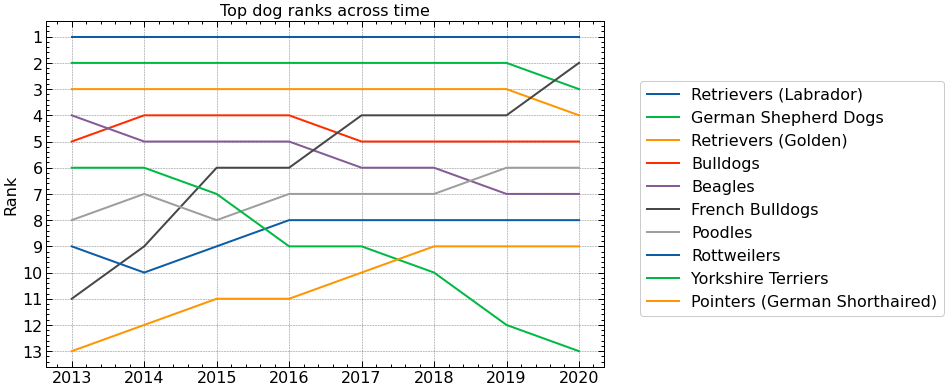

In [7]:
plt.style.use(['science' , 'notebook', 'grid'])
fig, axes = plt.subplots(2, figsize=(10,14))

ax = axes[0]
ax.set_title('Top dog ranks across time')
ax.set_ylabel('Rank')
ax.set_yticks(np.arange(1,15))
ax.plot(df
        .iloc[:10, 2:10]
        .rename(columns={'rank_2013': '2013', 'rank_2014': '2014', 'rank_2015': '2015', 'rank_2016': '2016', 'rank_2017': '2017', 'rank_2018': '2018', 'rank_2019': '2019', 'rank_2020': '2020'})
        .transpose(),
        label=df.breed.head(10))
ax.legend(bbox_to_anchor=(1.05, 0.85))
ax.invert_yaxis()

ax = axes[1]
ax.set_visible(False)

plt.show()

# Highest average rank for coat type/length

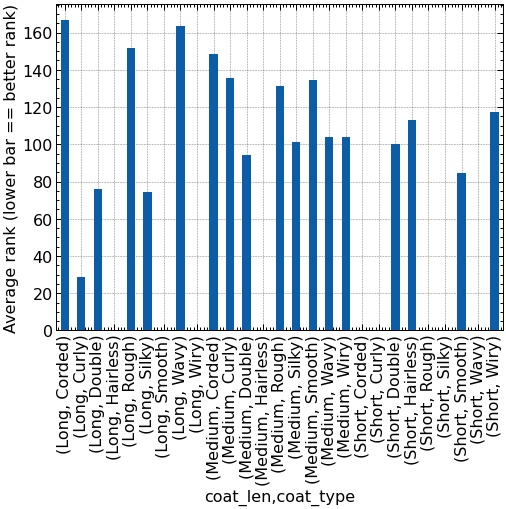

In [8]:
df.groupby(['coat_len', 'coat_type']).mean()['rank_avg'].plot(kind='bar', ylabel='Average rank (lower bar == better rank)')
plt.show()

# Visualize correlations between chosen features

In [9]:
df[['family', 'children', 'other_dogs', 'stranger', 'protection']].corr()

,family,children,other_dogs,stranger,protection
family,1.00,0.26,0.13,0.39,0.09
children,0.26,1.00,0.34,0.38,-0.18
other_dogs,0.13,0.34,1.00,0.22,-0.44
stranger,0.39,0.38,0.22,1.00,-0.17
protection,0.09,-0.18,-0.44,-0.17,1.00


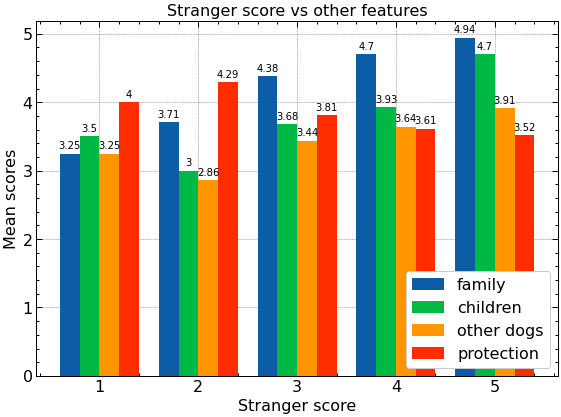

In [10]:
labels = ['1', '2', '3', '4', '5']
family = [df.query(f'stranger == {i}', engine='python').family.mean().round(2) for i in range(1,6)]
children = [df.query(f'stranger == {i}', engine='python').children.mean().round(2) for i in range(1,6)]
other_dogs = [df.query(f'stranger == {i}', engine='python').other_dogs.mean().round(2) for i in range(1,6)]
protection = [df.query(f'stranger == {i}', engine='python').protection.mean().round(2) for i in range(1,6)]

x = np.arange(len(labels)) + 1  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3*width/2, family, width, label='family')
rects2 = ax.bar(x - 1*width/2 , children, width, label='children')
rects3 = ax.bar(x + 1*width/2, other_dogs, width, label='other dogs')
rects4 = ax.bar(x + 3*width/2, protection, width, label='protection')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean scores')
ax.set_xlabel('Stranger score')
ax.set_title('Stranger score vs other features')
ax.legend(loc=4)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()
plt.show()